## PHYS 513 Computational Physics
### Homework 2 Solutions

Chapter 5 problems: 3, 5, 6, 7, 8, 9, 10, 12, 14

In [ ]:
%matplotlib inline

---
#### Exercise 5.3:
Consider the integral

$$𝐸(𝑥)=∫_0^x e^{−𝑡^2}𝑑𝑡.$$
 
a) Write a program to calculate  𝐸(𝑥)  for values of  𝑥  from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

b) When you are convinced your program is working, extend it further to make a graph of  𝐸(𝑥)  as a function of  𝑥 . If you want to remind yourself of how to make a graph, you should consult Section 3.1, starting of page 88.

Note that there is no known way to perform this particular integral analytically, so numerical approaches are the only way forward.

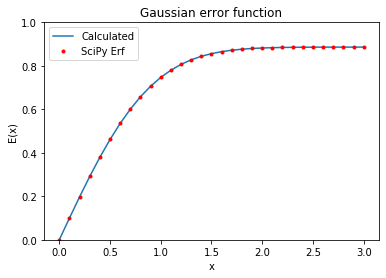

In [1]:
# Example solution

import numpy as np
import matplotlib.pylab as plt

def f(t):
    return np.exp(-t*t)

xmin = 0.0
xmax = 3.0
steps = 30
deltax = (xmax-xmin)/steps  
N = 1000
E = 0.0
xpoints = np.linspace(xmin,xmax,steps+1)

# Trapezoidal Rule to integrate between sample points

ypoints = []
for x in xpoints:   # Integrate from zero each time
    h = (x - xmin)/N
    E = 0.5*h*(f(xmin)+f(x))    # first/last points weight = 1/2
    for k in range(1,N):
        E += h*f(xmin+k*h)
    ypoints.append(E)
    
    
plt.plot(xpoints,ypoints,label='Calculated')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.ylim(0.0,1.0)
plt.title('Gaussian error function')


# Check:
# SciPy erf is normalized with 2/sqrt(pi), remove this for plot

from scipy.special import erf

plt.plot(xpoints,erf(xpoints)*np.sqrt(np.pi)/2,'ro',ms=3,label="SciPy Erf")
plt.legend()
plt.show()


----
#### Exercise 5.5: Error on Simpson's Rule

Following the same line of argument that led to Eq. (5.28), show that the error on an integral evaluated using Simpson's rule is given, to leading order in $h$, by Eq. (5.29).

**Solution**:  The error on Simpson's rule goes like the fourth power of the step size, so for a Simpson's rule estimate $I_1$ of an integral with exact value $I$, using step size $h_1$, we have 

$$I = I_1 + ch_1^4$$ 

for some constant $c$.  If we now half the step size to $h_2 = \frac{1}{2}h_1$ and make a new estimate $I_2$ of the integral, then we have

$$I = I_2 + ch_2^4$$.

Equating the two expressions for $I$ and making use of $h_1 = 2h_2$ we get 

$$I_1 + 16 ch^4_2 = I_2 + ch_2^4,$$

which can be rearranged to give the error on $I_2$,

$$\epsilon_2 = ch_2^4 = \frac{1}{15}(I_2 - I_1),$$

in agreement with Eq. (5.29)

---
#### Exercise 5.6: 

Write a program, or modify an earlier one, to once more calculate
the value of the integral $\int_0^2 (x^4 - 2x + 1) \> dx$ from
Example (5.28), using the trapezoidal rule with $20$ slices, but this time
have the program also print an estimate of the error on the result,
calculated using the method of Eq. (5.28).  To do this you will need to
evaluate the integral twice, once with $N_1=10$ slices and then again with
$N_2=20$ slices.  Then Eq. (5.28) gives the error.  How does the error
calculated in this manner compare with a direct computation of the error as
the difference between your value for the integral and the true value
of 4.4?  Why do the two not agree perfectly?

In [2]:
# Example program

def f(x):
    return x**4 - 2*x + 1

N1 = 10
N2 = 20
a = 0.0
b = 2.0
h1 = (b-a)/N1
h2 = (b-a)/N2

s = 0.5*(f(a)+f(b))
for k in range(1,N1):
    s += f(a+k*h1)
I1 = h1*s

s = 0.5*(f(a)+f(b))
for k in range(1,N2):
    s += f(a+k*h2)
I2 = h2*s

print(f"I1: {I1:.6f} \nI2: {I2:.6f}")
print(f"Estimated error = {abs(I1-I2)/3:.6f}")
print(f"Actual error = {abs(I2-4.4):.6f}")

I1: 4.506560 
I2: 4.426660
Estimated error = 0.026633
Actual error = 0.026660


**Discussion**: The estimated error agrees well with the true error, but not exactly, since both I1 and I2 are *estimates* of the integral.

---
#### Exercise 5.7:

Consider the integral
$$
I = \int_0^1 \sin^2 \sqrt{100 x} \> dx
$$

a) Write a program that uses the adaptive trapezoidal rule method of
  Section 5.3 and Eq. (5.34) to calculate the value of this integral to an
  approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits
  after the decimal point).  Start with one single integration slice and
  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its
  estimate of the error on the integral, for each value of the number of
  slices~$N$, until the target accuracy is reached.  (Hint: You should find
  the result is around $I=0.45$.)
  
b) Now modify your program to evaluate the same integral using the Romberg integration technique.  Have your program print out a triangular table of values, as on page 161, of all the Romberg estimates of the integral.  Calculate the error on your estimates using Eq. (5.49) and again continue the calculation until you reach an accuracy of $\epsilon = 10^{-6}$.  You should find that the Romberg method reaches the required accuracy considerably faster than the trapezoidal rule alone.

In [3]:
# 5.7a Example program

import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2

# Constants

target = 1.e-6  # Target accuracy
a = 0.0
b = 1.0
N = 1
h = (b-a)/N

# Calculate and print first approximation to the integral
I1 = 0.5*h* (f(a) + f(b))

print(f"N = {N:4}  I = {I1:.7f}")

# Main Loop
err = 1.0
while abs(err) > target:
    # Calc new estimate with h-> h/2,  N -> 2N
    I2 = I1/2        # accounts for new smaller slice size h
    h /= 2
    N *= 2
    for k in range(1,N,2):
        I2 += h*f(a+k*h)
        
    err = abs(I2-I1)/3
    
    I1 = I2
    
    #print results as we go
    print(f"N = {N:4}  I = {I2:.7f}  err = {err:.7f}")

N =    1  I = 0.1479795
N =    2  I = 0.3252319  err = 0.0590841
N =    4  I = 0.5122829  err = 0.0623503
N =    8  I = 0.4029974  err = 0.0364285
N =   16  I = 0.4301034  err = 0.0090353
N =   32  I = 0.4484147  err = 0.0061038
N =   64  I = 0.4539129  err = 0.0018328
N =  128  I = 0.4553485  err = 0.0004785
N =  256  I = 0.4557113  err = 0.0001209
N =  512  I = 0.4558022  err = 0.0000303
N = 1024  I = 0.4558249  err = 0.0000076
N = 2048  I = 0.4558306  err = 0.0000019
N = 4096  I = 0.4558321  err = 0.0000005


In [4]:
# set precision for output
%precision 6

'%.6f'

In [5]:
# 5.7b Example Program - Romberg

import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2

# Constants

target = 1.e-6  # Target accuracy
a = 0.0
b = 1.0
N = 1
h = (b-a)/N

# Calc and print first approx to integral
I1 = 0.5*h*(f(a) + f(b))
R1 = np.array([I1])
print("N = ",N,"  R = ",R1)

# main loop
err = 1.0
row = 1
while abs(err) > target:

    # calc new trapezoidal estimate
    h /= 2
    I2 = I1/2
    for k in range(N):
        I2 += h*f(a+(2*k+1)*h)
    
    # Calc new Romberg estimate
    row += 1
    R2 = np.empty(row)
    R2[0] = I2
    for m in range(1,row):
        err = (R2[m-1]-R1[m-1]) / (4**m - 1)
        R2[m] = R2[m-1] + err
    
    # update variables for next round
    N *= 2
    I1 = I2
    R1 = R2
    
    #print results so far
    print("N = ",N,"  R = ",R1)

N =  1   R =  [0.147979]
N =  2   R =  [0.325232 0.384316]
N =  4   R =  [0.512283 0.574633 0.587321]
N =  8   R =  [0.402997 0.366569 0.352698 0.348974]
N =  16   R =  [0.430103 0.439139 0.443977 0.445426 0.445804]
N =  32   R =  [0.448415 0.454518 0.455544 0.455727 0.455768 0.455777]
N =  64   R =  [0.453913 0.455746 0.455828 0.455832 0.455832 0.455832 0.455832]


---
#### Exercise 5.8:

Write a program that uses the adaptive Simpson's rule method of Section 5.3 and Eqs (5.35) to (5.39) to calculate the same integral as in Exercise 5.7, again to an approximate accuracy of $\epsilon = 10^{-6}$.  Starting this time with two integration slices, work up from there to four, eight, and so forth, printing out the results at each step until the required accuracy is reached.  You should find you reach that accuracy for a significantlyly smaller number of slices than with the trapezoidal rule calculation in part (a) fo 5.7, but a somewhat larger number than with the Romberg integration of part (b).

In [6]:
# Example program 5.8

import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2

# Constants

target = 1.e-6  # Target accuracy
a = 0.0
b = 1.0
N = 2
h = (b-a)/N

# Calc integral for N=2
S = (f(a)+f(b))/3
T = 2*f(a+h)/3
I1 = h*(S+2*T)

# Calc integral for N=4
h /= 2
S += T
T = 2*(f(a+h) + f(a+3*h))/3
I2 = h*(S+2*T)

# calc the error
err = abs(I2-I1)/15
N = 4
print(f"N = {N:4}  I = {I2:.7f}  err = {err:.7f}")

# Main loop
while err >= target:
    
    # calc new estimate of the integral
    N *= 2
    h /= 2
    I1 = I2
    S += T
    T = 0
    for k in range(1,N,2):
        T += 2*f(a+k*h)/3
    I2 = h*(S+2*T)
    
    # calc new estimate of error
    err = abs(I2-I1)/15
    print(f"N = {N:4}  I = {I2:.7f}  err = {err:.7f}")

N =    4  I = 0.5746332  err = 0.0126878
N =    8  I = 0.3665690  err = 0.0138709
N =   16  I = 0.4391387  err = 0.0048380
N =   32  I = 0.4545184  err = 0.0010253
N =   64  I = 0.4557457  err = 0.0000818
N =  128  I = 0.4558270  err = 0.0000054
N =  256  I = 0.4558322  err = 0.0000003


---
#### Exercise 5.9

Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be
$$
C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 {\rm e}^x\over({\rm e}^x-1)^2}\> dx,
$$
where $V$ is the volume of the solid, $\rho$~is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
*Debye temperature*, a property of solids that depends on their
density and speed of sound.


a) Write a Python function `cv(T)` that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points.
  
b) Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K.

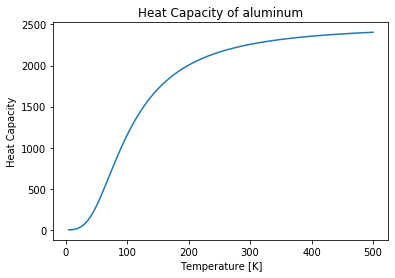

In [7]:
# Example program 5.9

import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw


f = lambda x: x**4 * np.exp(x)/np.expm1(x)**2   # expm1(x) = exp(x)-1

V = 0.001      # Volume in m^3
rho = 6.022e28 # number density of aluminum
thetaD = 428.0 # Debye Temp of aluminum
kB = 1.38065e-23 # Boltzman's constant
N = 50
x,w = gaussxw(N)

# Integrand
def f(x):
    return (x**4)*np.exp(x)/np.expm1(x)**2   # expm1 = (exp(x)-1)

# Function to compute Cv using Gaussian quadrature
def cv(T):
    a = 0
    b = thetaD/T
    xp = 0.5*(b+a) + 0.5*(b-a)*x
    wp = 0.5*(b-a)*w
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
    return 9*V*rho*kB*((T/thetaD)**3)*s

tpoints = np.linspace(5,500,500)
ypoints = np.empty(len(tpoints))
for i in range(len(tpoints)):
    ypoints[i] = cv(tpoints[i])



plt.plot(tpoints,ypoints)
plt.xlabel('Temperature [K]')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity of aluminum')
plt.show()

---
#### Exercise 5.10: Period of an anharmonic oscillator

One way to calculate the motion of an oscillator is to write down the equation for conservation of energy in the system.  If the particle has mass $m$ and position $x$, then the total energy is equal to the sum of the kinetic and potential energies thus:

$$E = \frac{1}{2} m\left({\frac{dx}{dt}}\right)^2 + V(x).$$

Assume the potential is symmetric about $x=0$ with amplitude $a$.  We have $E=V(a)$.

**a)** When particle reaches origin for the first time, it has gone through one quarter of a period of the oscillator.  By rearranging the equation above for $dx/dt$ and then integrating with respect to $t$ from 0 to $T/4$, show that the period $T$ is given by 

$$T = \sqrt{8m}\int_0^a \frac{dx}{\sqrt{V(a) -V(x)}}$$

**Solution to part a**: Rearranging and putting $E=V(a)$, we get

$$\sqrt{\frac{1}{2}m}\frac{dx/dt}{-\sqrt{V(a) -V(x)}} = 1$$
Notice that we take the negative square root, since $dx/dt$ is clearly negative.  Now we integrate with respect to $t$ on both sides up to $t = T/4$, noting that $x(t=0) = a$ and $x(t=\frac{1}{4}T) = 0$, to get

$$-\sqrt{\frac{1}{2}m}\int_a^0 \frac{dx}{\sqrt{V(a) -V(x)}} = \frac{1}{4}T.$$

Then the required result follows straigtforwardly.

**b)** Suppose that the potential is $V(x) = x^4$ and the mass is $m=1$.  Write a Python function that calculates the period of the oscillator for a given amplitude $a$ using Gauussian quadrature with $N=20$ points, then use your function to make a graph of the period for amplitudes ranging from $a=0$ to $a=2$.


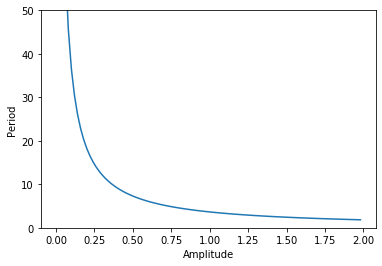

In [8]:
# example program for 5.10b

import numpy as np
from gaussxw import gaussxw
import matplotlib.pyplot as plt

m = 1.0
N = 20
x,w = gaussxw(N)

def V(x):
    return x**4

# function to calculate period
def T(a):
    E = V(a)
    
    xp = 0.5*a*(x+1)
    wp = 0.5*a*w
    s = 0.0
    for i in range(N):
        s += wp[i]/np.sqrt(E-V(xp[i]))
        
    return np.sqrt(8*m)*s

# Main program
apoints = np.arange(1.e-6,2,0.02)     # zero causes 1/0 problem - nan
tpoints = np.empty(len(apoints))
for i in range(len(apoints)):
    tpoints[i] = T(apoints[i])
plt.plot(apoints,tpoints)
plt.xlabel("Amplitude")
plt.ylabel("Period")
plt.ylim(0,50)
plt.show()

5.10c  The period decreases with greater amplitude.  A harmonic osciallator has a constant period because even though it travels farther wheen the ampoitude is greater is also travels faster, because the initial potential energy is greater for greater amplitude.  The same is true in the anharmonic oscillator above, but the effect is even more pronounced because the potential function is steeper at the edges.  This means that for a given amplitude the oscillator travels even faster than a harmonic oscillator would, and hence the period actually gets shorter when we increase the amplitude.  Conversely when we decrease the ampoitude to near zero, the osciallator travels slower than the corresponding harmonic oscillator and takes longer and longer per cycle.

---
#### Exercise 5.12: The Stefan-Boltzman Constant

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega+d\omega$, a blackbody of unit area radiates an amount of thermal energy per second equal to $I(\omega)\,d\omega$, where

$$I(\omega) = \frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{(e^{\hbar\omega/kT}-1)}$$

**a)** Show that the total energy per unit area radiated by a blackbody is

$$W = \frac{k^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx$$

**Solution to (a)**
Making the substitutions $x = \hbar \omega / kT$ and $dx = (\hbar/kT) dx$ the result 

$$I(x)dx = \frac{k^4T^4}{4\pi^2c^2\hbar^3}\frac{x^3}{(e^x-1)}dx$$

is straightforward.

**b-c)** Write a program to evaluate the integral and compare with the published value.

Note program outputs 5.67036e-8, which agrees well with the NIST value.


In [9]:
# 5.12 Stefan-Boltzman Constant

# example program for 5.10b

import numpy as np
from gaussxw import gaussxwab
from scipy.constants import Boltzmann, hbar, c, pi, sigma

def f(x):
    return (x**3)*np.exp(-x)/(1-np.exp(-x))

a = 0.0   # using z = x / (1+x) since infinite range
b = 1.0
N = 100

z,w = gaussxwab(N,a,b)

s = 0.
for k in range(N):
    s += w[k]*f(z[k]/(1-z[k]))/(1-z[k])**2

print(s*Boltzmann**4/(4*pi**2*c**2 * hbar**3))
print("NIST Value: ",sigma)

5.6703668160832686e-08
NIST Value:  5.670367e-08


---
#### Exercise 5:14: Gravitational pull of a uniform sheet (process works for sheets of stars, too)

A uniform sheet of metal is floating motionless in space.  The sheet is 10 m on a side and of negligible thickness.  It has a mass of 10 metric tonnes.

**a)** Consider the gravitational force due to the plate felt by a point mass of 1 kg a distance $z$ from the center of the square, in the direction perpendicular to the sheet, as shown in the figure in the text.  Show that the component of the force along the $z$-axis is 

$$F_z = G\sigma z\int_{-L/2}^{L/2}\int_{-L/2}^{L/2}\frac{dx\,dy}{(x^2+y^2+z^2)^{3/2}},$$

where $G$ is the gravitational constant, and $\sigma$ is the mass surface density of the sheet.

**Solution to (a)**: 
By symmetry we know the acceleration will be perpendicular to the $z=0$ plane. The element of mass is $dm=\sigma\,dx\,dy$ and the magnitude of it's gravitational pull is $G\,dm/r^2 = G\sigma\,dx\,dy/r^2$.   The component of force in the $z$-direction is this quantity multiplied by the cosine of the angle to the $z$-axis, which is $z/r$, so the $z$ element of forced is

$$dF_z = G\sigma\frac{z}{r^3}\,dx\,dy.$$

Using $r=\sqrt{x^2+y^2+z^2}$ and integrating over the area of the who'e plate then gives the quoted result.

**b)** Write a program to calulate and plot the force as a function of $z$ from $z=0$ to $z=10$ m.  For the double integral use (double) Gaussian quadrature, as in Eq. (5.82) with 100 sample points along each axis.

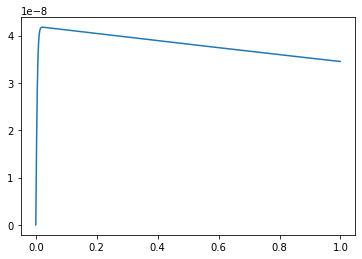

In [11]:
# 5.14b Sample program

from gaussxw import gaussxwab
import numpy as np
import matplotlib.pyplot as plt
from numba import jit   # this speeds things up!

zmin = 0.0
zmax = 1.0
zstep = 0.001
N=1000
L = 10.0
G = 6.674e-11
sigma = 100.0

x,w = gaussxwab(N,-L/2,L/2)

# perform the double integral
@jit(nopython=True)
def f(z):
    s = 0.0
    for i in range(N):
        for j in range(N):
            r32 = (x[i]**2 + x[j]**2 + z**2)**1.5
            s += w[i]*w[j]/r32
    return G*sigma*z*s

# Main Program
zpoints = np.arange(zmin,zmax,zstep)
fpoints = np.empty(len(zpoints))
for i in range(len(zpoints)):
    fpoints[i] = f(zpoints[i])
plt.plot(zpoints,fpoints)
plt.show()

**c)** In the code above, I set $L=10$ and only sampled $z$ over the range 0 to 1.  This approximates an infinate plane.  From Gauss' law, we *should* see a constant force, but we don't.  The drop to zero as $z\rightarrow0$ is an artifact that arises because when we are close to the plane we are dominated by the attraction of the nearby parts of the plate, but there are no points near the origin.  We can increase the number of points, and this helps, but doesn't eliminate the problem.  Note Gaussian quadrature is probably not the best technique for this problem since it has *few* points in the middle of the integration domain.  